# 🏡 Real Estate Price Prediction with Neural Networks

This notebook presents a machine learning project focused on predicting real estate prices in King County, USA, using artificial neural networks. The goal is to estimate house sale prices based on a variety of property features such as size, location, renovations, and more.

---

### 🔍 About This Notebook

This project **originates from a guided lab** in the [Coursera course](https://www.coursera.org/learn/deep-learning-for-real-estate-price-prediction/home/module/1) *Deep Learning for Real Estate Price Prediction* taught by **Dr. Ryan Ahmed**. 

However, this notebook has been **heavily extended, restructured, and corrected** beyond the original version. All code, data handling, analysis, and visualizations have been **refined and re-implemented** to:

- Correct major issues like **data leakage** in the original version.
- Improve code clarity and modularity.
- Add new plots, evaluation metrics (including **Adjusted R²**), and deeper model analysis.
- Introduce architecture optimization and performance tracking.
- Adapt the content for learning and portfolio purposes.

> ✅ This is **not** a copy-paste from the guided lab. It reflects my personal work to turn a raw prototype into a clean, correct, and well-documented deep learning project.

---

### 📦 Dataset  
The dataset contains information about house sales in King County between May 2014 and May 2015.  
It is publicly available on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).

---

### 🎯 Project Objectives
- Understand the dataset and its features  
- Preprocess the data properly (scaling, splitting, avoiding data leakage)  
- Build and train a deep learning model using Keras  
- Evaluate model performance using metrics like RMSE, MAE, R², and Adjusted R²  
- Optimize the model architecture to improve predictive accuracy  


### 🛠️ Installation Requirements

Before running this notebook, make sure you have the following Python libraries installed:

```bash
pip install pandas numpy matplotlib seaborn jupyterthemes tensorflow


---

# 📚 Import Libraries and Load Dataset

In this section, we will import the necessary libraries and load the housing dataset from Kaggle.  
We will also perform an initial exploration of the data using `.head()`, `.tail()`, and `.info()` to understand the structure, types, and content of the dataset.

> 💾 **Note:** The dataset used in this project is [`kc_house_data.csv`](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).  
> Please make sure to download it manually from Kaggle and place it in the same directory as this notebook.  
>  
> If you're working in a local environment, make sure the file name and path match exactly.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# # Without this style configuration, axis labels may appear black-on-black and become unreadable in dark themes.

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

---

### 🧠 Practice Opportunity #1 (Optional)

- 💰 **What is the average house price?**
- 🏠 **What is the price of the cheapest house?**
- 🛁 **What is the average number of bathrooms and bedrooms?** (round down)
- 🛏️ **What is the maximum number of bedrooms?**

**What is the average house price?**

In [6]:
avg_price = house_df['price'].mean()
print(f"The average price is {avg_price}")

The average price is 540088.1417665294


**What is the price of the cheapest house?**

In [7]:
cheapest_house = house_df.price.min()
print(f"The price of the cheapest house is {cheapest_house}")

The price of the cheapest house is 75000.0


**What is the average number of bathrooms and bedrooms? round your answer to the lowest value**

In [8]:
# We use int() to round down as instructed

avg_bathrooms = int(house_df.bathrooms.mean())
print(f"The average number of bathrooms is {avg_bathrooms}")

The average number of bathrooms is 2


In [9]:
# We use int() to round down as instructed

avg_bedrooms = int(house_df.bedrooms.mean())
print(f"The average number of bedrooms is {avg_bedrooms}")

The average number of bedrooms is 3


**What is the maximum number of bedrooms?**

In [10]:
max_bedrooms = house_df.bedrooms.max()
print(f"The maximum number of bedrooms is {max_bedrooms}")

The maximum number of bedrooms is 33


# 📊 Perform Data Visualization

In this task, we will explore the dataset visually to understand patterns, distributions, and relationships between features and the target variable (`price`). Visualizations help identify trends, correlations, and potential anomalies that can guide data preprocessing and model selection.

The following visualizations will be included:

- A **scatter plot** to explore the relationship between `sqft_living` and `price`.
- **Histograms** of all numeric features to understand their distributions.
- A **heatmap of correlations** to identify strongly correlated variables.
- A **pairplot** (optional practice) to visually inspect multivariate relationships between selected features.

💡 **Note:** We must use the argument `numeric_only=True` when calling `.corr()` to avoid errors due to non-numeric columns like `date`.

These visualizations will also help us identify which features may be most predictive of house prices.

---


<Axes: xlabel='sqft_living', ylabel='price'>

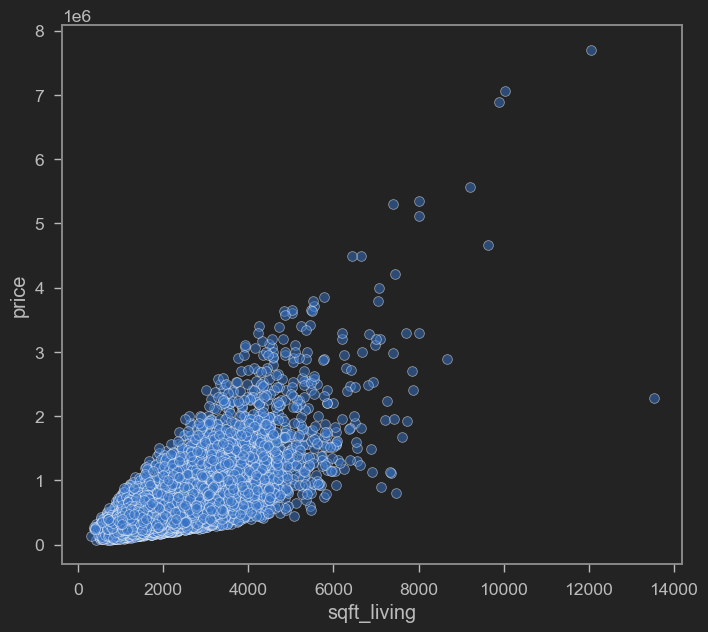

In [11]:
sns.scatterplot(x='sqft_living', y='price', data=house_df, alpha=0.5)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

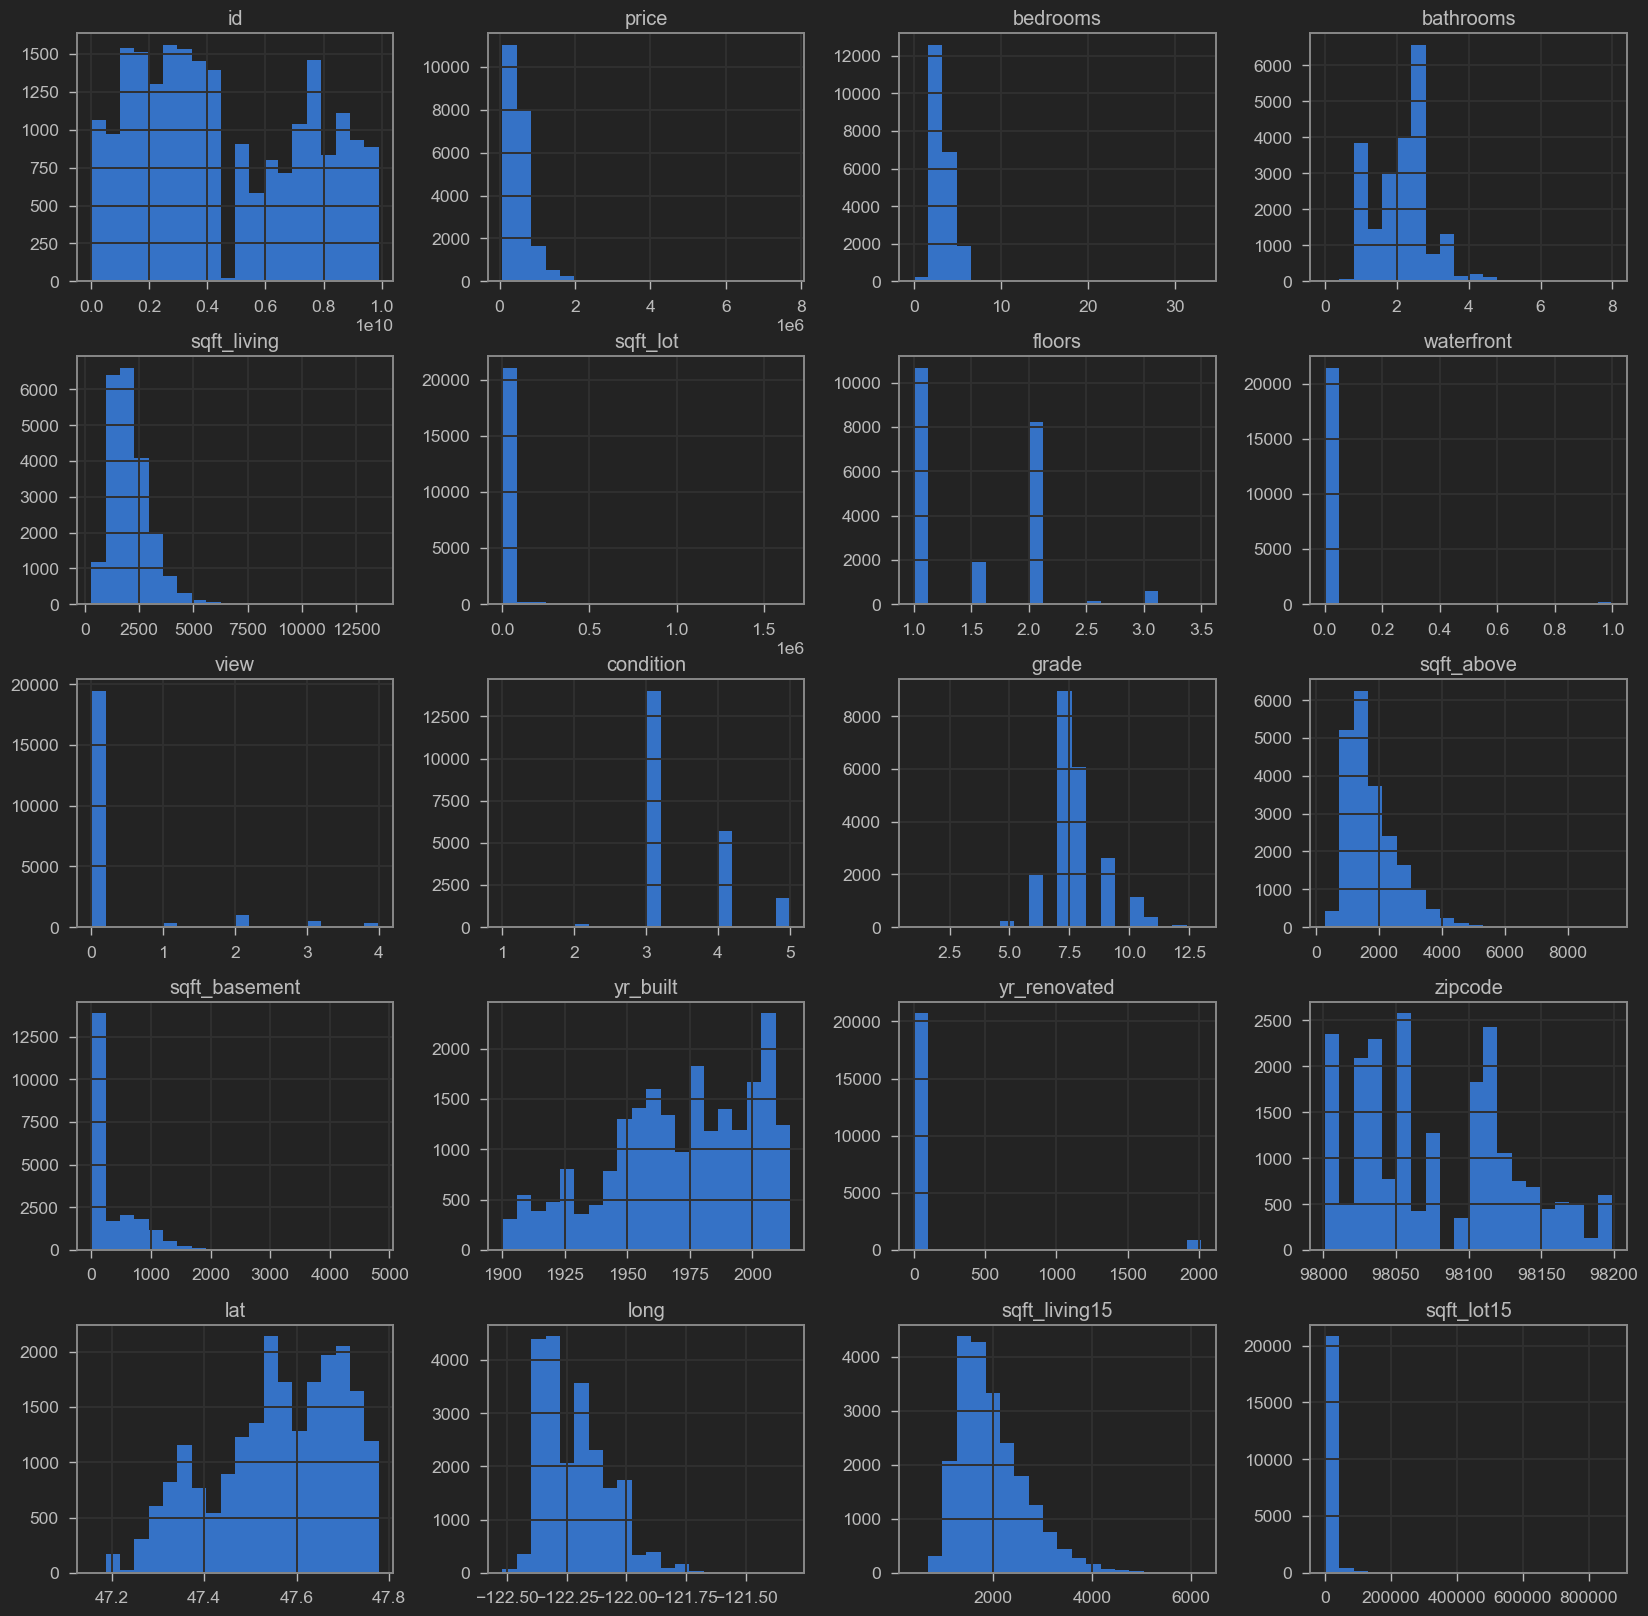

In [12]:
house_df.hist(bins = 20, figsize= (20, 20), color='b')

<Axes: >

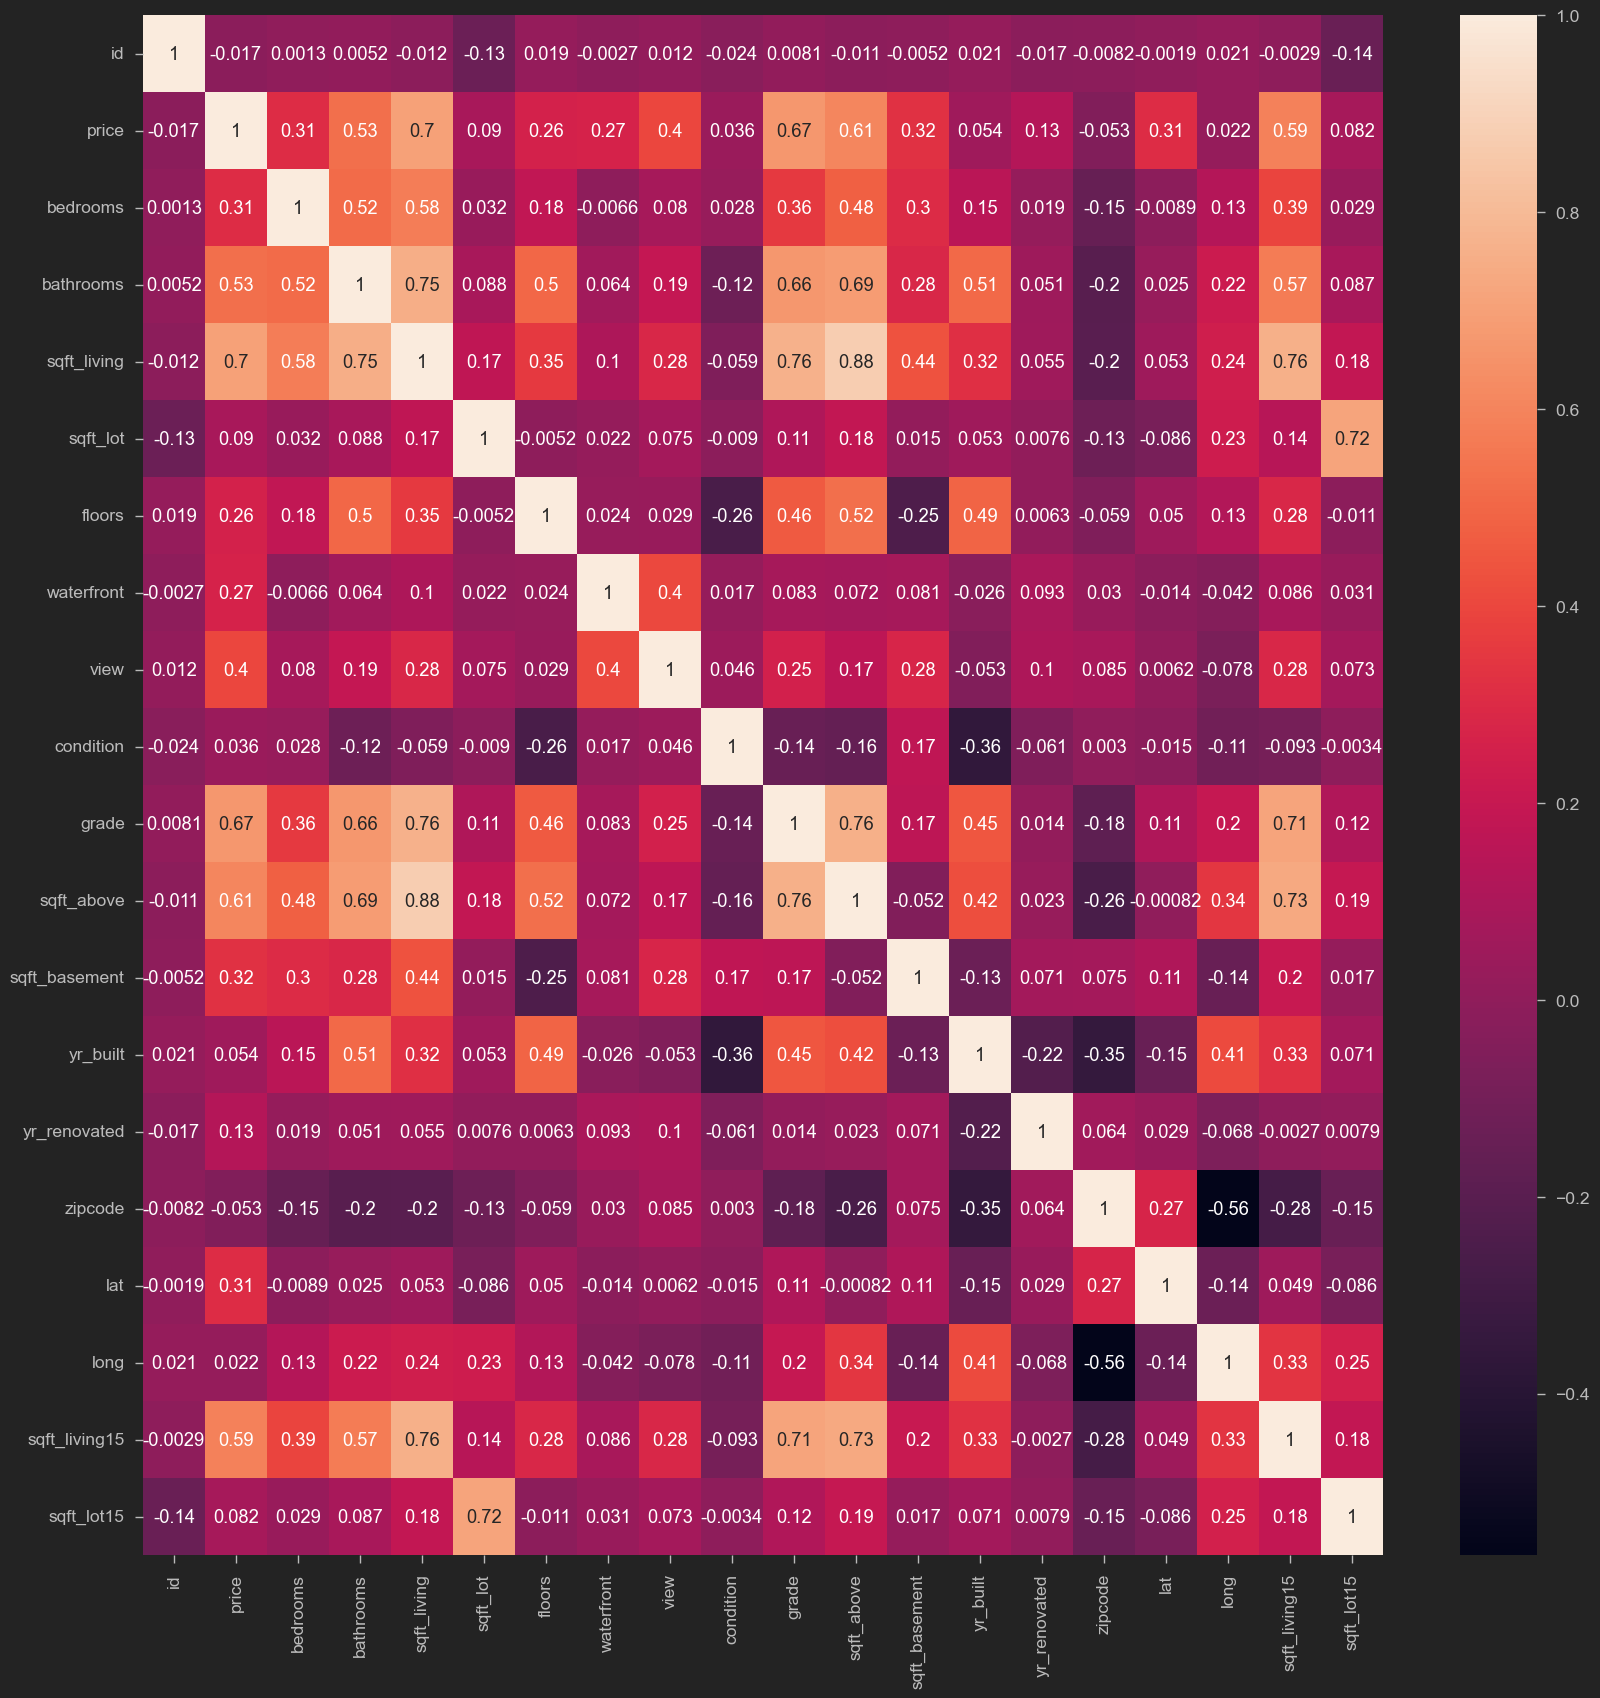

In [13]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(house_df.corr(numeric_only=True), annot=True)

In [14]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [15]:
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


### 🧠 Practice Opportunity #2 (Optional)

- Using Seaborn, plot the pairplot for the features contained in `house_df_sample`  
- Explore the data and perform sanity check

> This plot helps visually confirm the strength and nature of relationships between variables, supporting our previous correlation analysis.

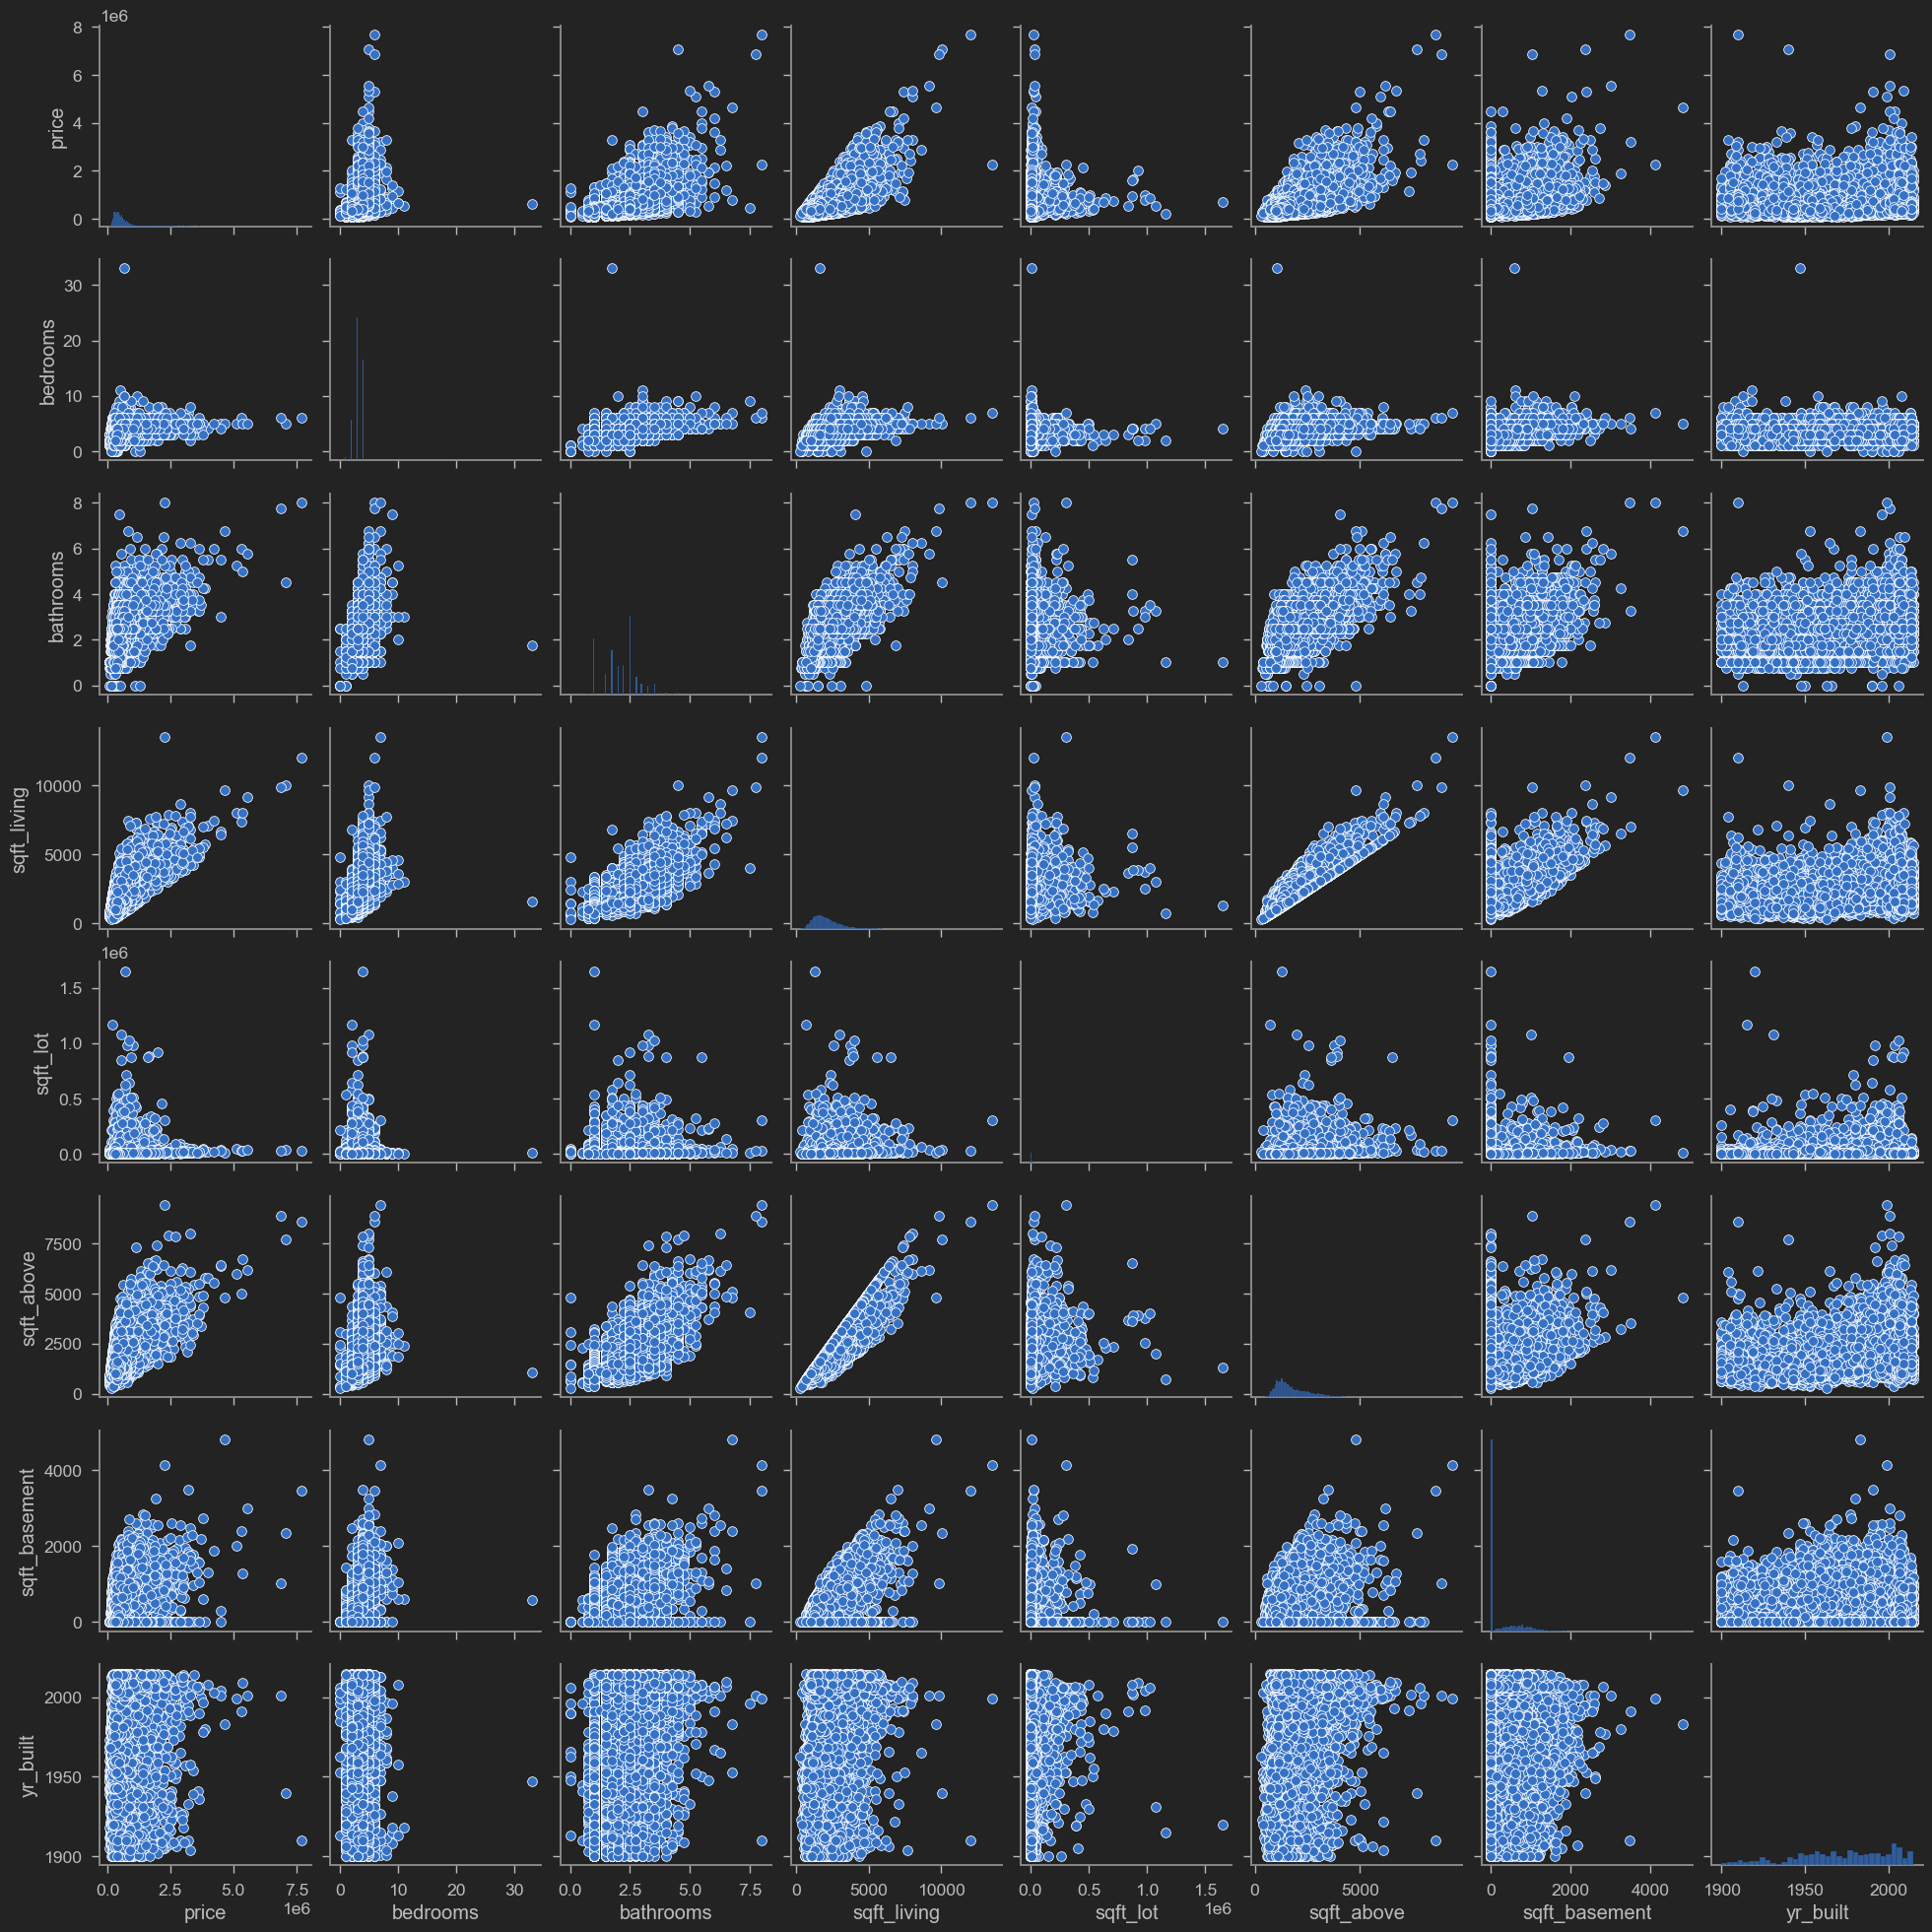

In [16]:
sns.pairplot(data=house_df_sample)

### ✅ Summary: Key Insights from Data Visualization

The visualizations provided valuable insights into the dataset:

- The **scatter plot** revealed a strong positive correlation between `sqft_living` and `price`, suggesting that larger houses tend to be more expensive.
- The **histograms** showed the distribution of numeric features, including skewed variables like `price`, `sqft_lot`, and `sqft_basement`, which may benefit from transformation or normalization.
- The **heatmap** highlighted that features such as `sqft_living`, `grade`, and `sqft_above` are positively correlated with `price`, indicating potential relevance for model building.
- The **pairplot** helped visually confirm relationships and detect potential multicollinearity between features like `sqft_living` and `sqft_above`.

These observations will guide feature selection and preprocessing in the upcoming steps of the project.


---

# 🧹 Perform Data Cleaning and Feature Engineering

In this step, we will prepare the data for model training. This involves selecting relevant features, separating the dataset into training and testing sets, and applying preprocessing techniques like scaling. Proper preprocessing is essential to ensure the model learns from accurate, normalized data and generalizes well to unseen examples.

The main steps will include:

- Selecting a subset of numeric features related to housing characteristics.
- Splitting the data into training and testing subsets.
- Scaling the features and target variable using Min-Max normalization.
- Reviewing the scaling ranges and checking the shape of the scaled training data.


In [17]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
print("Selected features:", selected_features)

Selected features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']


In [18]:
X_simple = house_df[selected_features]

In [19]:
X_simple

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [20]:
y_simple = house_df['price']

In [21]:
y_simple

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [22]:
# train/test separation BEFORE scaling
from sklearn.model_selection import train_test_split

X_train_simple, X_test_simple, y_train_simple, y_test_simple = \
train_test_split(X_simple, y_simple, test_size=0.25, random_state=42)

In [23]:
# # Overwriting the original train/test sets with their scaled versions
from sklearn.preprocessing import MinMaxScaler

scaler_X_simple = MinMaxScaler()
X_train_simple = scaler_X_simple.fit_transform(X_train_simple)
X_test_simple = scaler_X_simple.transform(X_test_simple)

scaler_y_simple = MinMaxScaler()
y_train_simple = scaler_y_simple.fit_transform(y_train_simple.values.reshape(-1, 1))
y_test_simple = scaler_y_simple.transform(y_test_simple.values.reshape(-1, 1))

In [24]:
# Check the shape of the training data after scaling
print("X_train shape:", X_train_simple.shape)

X_train shape: (16209, 7)


In [25]:
# Review the scaling range used for X
print("X scaler max:", scaler_X_simple.data_max_)
print("X scaler min:", scaler_X_simple.data_min_)

X scaler max: [3.300000e+01 8.000000e+00 1.205000e+04 1.164794e+06 3.500000e+00
 8.860000e+03 4.820000e+03]
X scaler min: [  0.   0. 290. 520.   1. 290.   0.]


✅ **Preprocessing Completed**

The data is now cleaned, split, scaled, and ready for model training and evaluation.  
⚠️ *Note:* We ensured proper preprocessing by splitting the data **before** scaling, avoiding data leakage.


---

# 🧠 Train a Deep Learning Model with Limited Number of Features

In this step, we will build and train a deep neural network using a limited set of features. The goal is to evaluate the model's ability to learn complex patterns from a smaller feature set.

The key steps include:

- Defining a Sequential model architecture using the Keras API.
- Adding multiple hidden layers with ReLU activation and one output layer with linear activation.
- Compiling the model with the Adam optimizer and Mean Squared Error (MSE) as the loss function.
- Training the model on the scaled training data and validating it using a split of the training set.
- Reviewing the model summary to understand the number of trainable parameters.

Additionally, we'll experiment by adding an extra hidden layer to observe how it impacts the model's capacity and number of parameters.


In [26]:
X_train_simple.shape

(16209, 7)

In [27]:
X_test_simple.shape

(5404, 7)

In [28]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

model_example = Sequential()
model_example.add(Input(shape=(7,)))  
model_example.add(Dense(100, activation='relu'))
model_example.add(Dense(100, activation = 'relu'))
model_example.add(Dense(100, activation = 'relu'))
model_example.add(Dense(1, activation='linear'))

In [29]:
model_example.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_example.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [31]:
# We disable verbose to keep the notebook clean (loss plots are shown separately)
epochs_hist_example = model_example.fit(X_train_simple, y_train_simple, epochs = 100, batch_size = 50, verbose = 0, validation_split = 0.2)

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Change the architecture of the network by adding an additional dense layer with 200 neurons. Use "Relu" as an activation function**
- **How many trainable parameters does the new network has?**

In [32]:
model_simple = Sequential()
model_simple.add(Input(shape=(7,))) 
model_simple.add(Dense(100, activation = 'relu'))
model_simple.add(Dense(100, activation = 'relu'))
model_simple.add(Dense(100, activation = 'relu'))
model_simple.add(Dense(200, activation = 'relu'))
model_simple.add(Dense(1, activation='linear'))
model_simple.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,401 (161.72 KB)

 Trainable params: 41,401 (161.72 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# We disable verbose to keep the notebook clean (loss plots are shown separately)

model_simple.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist_simple = model_simple.fit(X_train_simple, y_train_simple, epochs = 100, batch_size = 50, verbose = 0, validation_split = 0.2)

✅ **Training Completed**

The deep learning models were successfully built and trained using the limited feature set.  
We also explored how architectural changes—like adding an extra dense layer—affect the model's complexity and number of parameters.

📌 *Note:* We'll evaluate these models in the next steps to compare their predictive performance on the test data.

---

# 🧪 **Evaluate Trained Deep Learning Model Performance**

In this step, we will assess how well our trained deep learning model performs. The evaluation includes:

- Visualizing training and validation loss over epochs to check for overfitting or underfitting.
- Predicting a new sample input.
- Comparing predicted and true values for the test set.
- Calculating standard regression metrics such as RMSE, MAE, and R² score.


**Plot training and validation loss over epochs**

In [34]:
epochs_hist_simple.history.keys()

dict_keys(['loss', 'val_loss'])

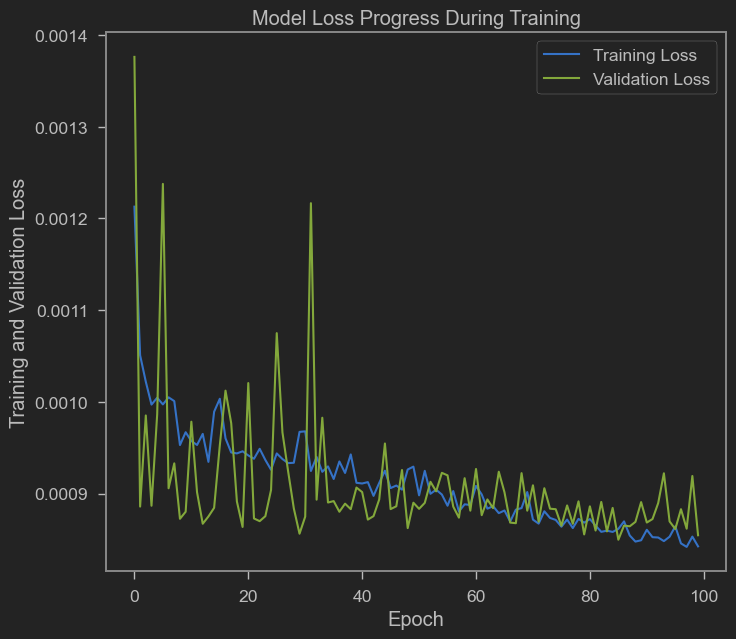

In [35]:
plt.plot(epochs_hist_simple.history['loss'])
plt.plot(epochs_hist_simple.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

**Predict price for a new house based on custom input**

📌 Let's test our trained model with a custom input:
We create a new house sample with the following features:
- 4 bedrooms, 3 bathrooms, 1960 sqft of living space, 5000 sqft lot, 1 floor,
- 2000 sqft above ground and 3000 sqft basement.

We will:
- Scale the input using the same scaler as before.
- Make a prediction using our trained model.
- Inverse-transform the predicted price to get the original dollar value.

In [36]:
X_test_1 = pd.DataFrame([[4, 3, 1960, 5000, 1, 2000, 3000]],
                        columns=selected_features)

X_test_scaled_1 = scaler_X_simple.transform(X_test_1)

y_predict_1 = model_simple.predict(X_test_scaled_1)

y_predict_1 = scaler_y_simple.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[786387.4]], dtype=float32)

**Compare model predictions with true values on the test set**

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


Text(0, 0.5, 'True Values')

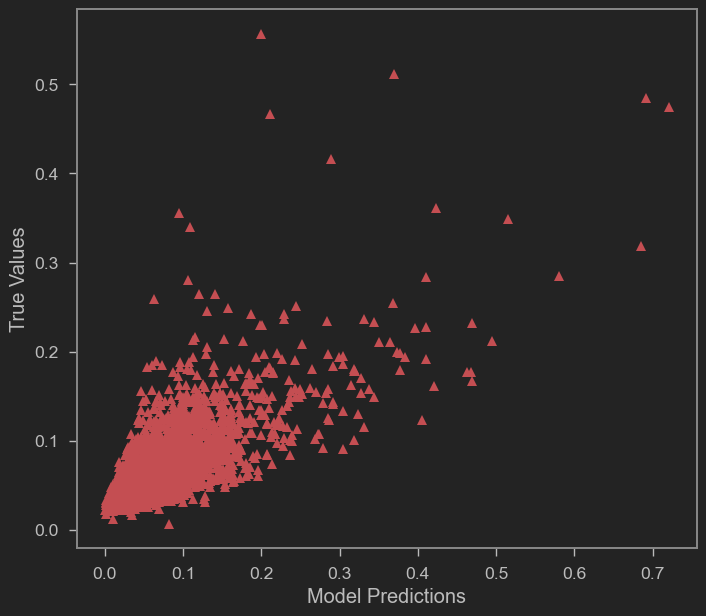

In [37]:
y_predict_simple = model_simple.predict(X_test_simple)
plt.plot(y_test_simple, y_predict_simple, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [38]:
y_predict_orig_simple = scaler_y_simple.inverse_transform(y_predict_simple)
y_test_orig_simple = scaler_y_simple.inverse_transform(y_test_simple)


(0.0, 3000000.0)

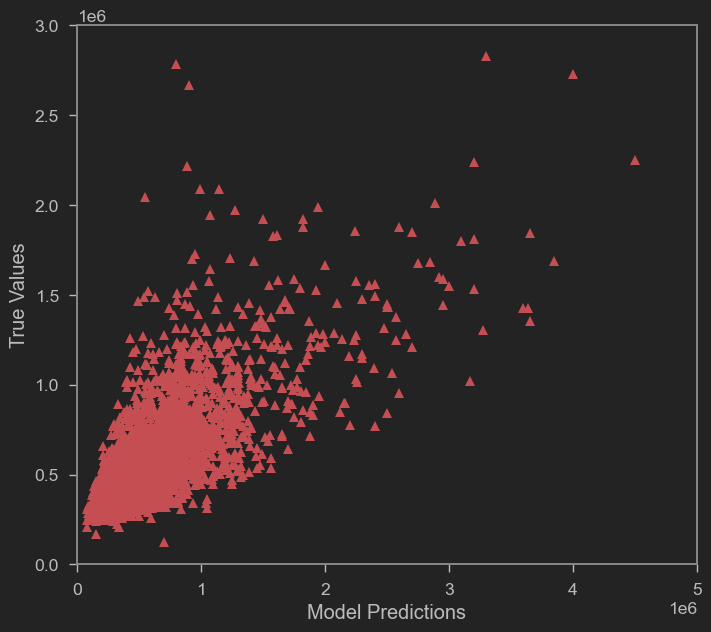

In [39]:
plt.plot(y_test_orig_simple, y_predict_orig_simple, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

**Calculate regression metrics: RMSE, MAE, MSE, R² and Adjusted R²**

In [40]:
k = X_test_simple.shape[1]
n = len(X_test_simple)
n

5404

In [41]:
k

7

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig_simple, y_predict_orig_simple)),'.3f'))
MSE = mean_squared_error(y_test_orig_simple, y_predict_orig_simple)
MAE = mean_absolute_error(y_test_orig_simple, y_predict_orig_simple)
r2 = r2_score(y_test_orig_simple, y_predict_orig_simple)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 257470.217 
MSE = 66290912466.29217 
MAE = 160006.19435256292 
R2 = 0.5568422670782602 
Adjusted R2 = 0.5562673775062712


---

✅ **Evaluation Completed**

We have assessed the performance of our model both visually and numerically.

- The loss curves show a consistent decrease, indicating proper training.
- The prediction on a new sample returned a realistic price.
- The scatter plot of predictions vs. true values confirms the model is capturing the trend.
- Evaluation metrics like RMSE and R² give us a quantitative measure of model accuracy.

These results help us validate the current model and guide future improvements.

---

# 🧪 Train and Evaluate a Deep Learning Model with Increased Number of Features

In this step, we will train a new deep learning model using a **larger set of independent variables** to improve prediction accuracy.

We will:
- Use a total of 19 input features.
- Scale the input and output data.
- Train a neural network on the full feature set.
- Evaluate performance visually and numerically.


In [43]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X_complete = house_df[selected_features]
y_complete = house_df['price']

In [44]:
from sklearn.model_selection import train_test_split
X_train_complete, X_test_complete, y_train_complete, y_test_complete = \
        train_test_split(X_complete, y_complete, test_size = 0.25)

In [45]:
# Overwriting the original train/test sets with their scaled versions

from sklearn.preprocessing import MinMaxScaler
scaler_X_complete = MinMaxScaler()
scaler_y_complete = MinMaxScaler()
X_train_complete = scaler_X_complete.fit_transform(X_train_complete)
X_test_complete = scaler_X_complete.transform(X_test_complete)
y_train_complete = scaler_y_complete.fit_transform(y_train_complete.values.reshape(-1,1))
y_test_complete = scaler_y_complete.transform(y_test_complete.values.reshape(-1,1))

**Create a new model using the same scaled dataset (X_train_complete and y_train_complete)**

In [46]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model_complete = Sequential()
model_complete.add(Input(shape=(19,)))
model_complete.add(Dense(10, activation = 'relu'))
model_complete.add(Dense(10, activation = 'relu'))
model_complete.add(Dense(1, activation = 'linear'))

**Compile the new deep learning model with Adam optimizer and MSE loss**

In [47]:
model_complete.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Train the new model using the same training configuration**

In [48]:
# We disable verbose to keep the notebook clean (loss plots are shown separately)

epochs_hist_complete = model_complete.fit(X_train_complete, y_train_complete, epochs = 100, batch_size = 50, verbose = 0, validation_split = 0.2)

**Plot training and validation loss over epochs**

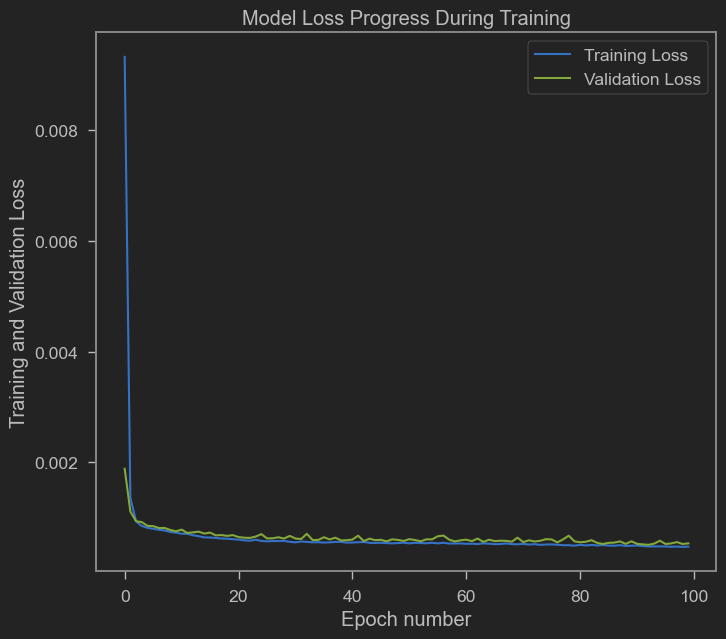

In [49]:
plt.plot(epochs_hist_complete.history['loss'])
plt.plot(epochs_hist_complete.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

**Compare model predictions with true values on the test set**

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step


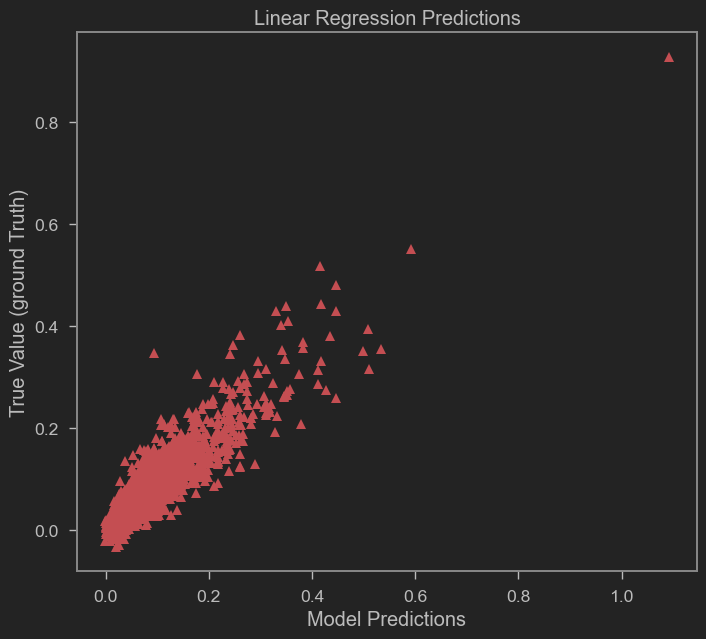

In [50]:
# Predict house prices using the improved model
y_predict_complete = model_complete.predict(X_test_complete)
plt.plot(y_test_complete, y_predict_complete, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [51]:
# Inverse-transform predictions and true values to compare in original dollar scale
y_predict_orig_complete = scaler_y_complete.inverse_transform(y_predict_complete)
y_test_orig_complete = scaler_y_complete.inverse_transform(y_test_complete)

(0.0, 3000000.0)

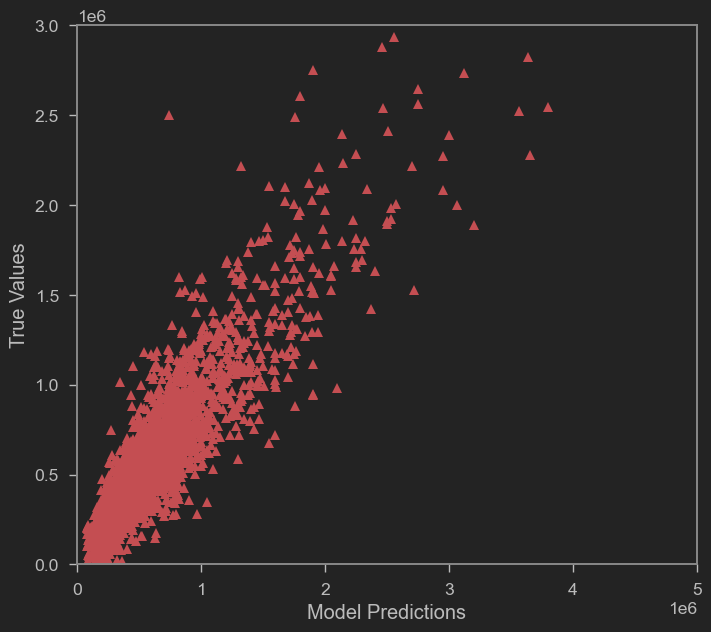

In [52]:
plt.plot(y_test_orig_complete, y_predict_orig_complete, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

**Calculate regression metrics: RMSE, MAE, MSE, R² and Adjusted R²**

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig_complete, y_predict_orig_complete)),'.3f'))
MSE = mean_squared_error(y_test_orig_complete, y_predict_orig_complete)
MAE = mean_absolute_error(y_test_orig_complete, y_predict_orig_complete)
r2 = r2_score(y_test_orig_complete, y_predict_orig_complete)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 156573.543 
MSE = 24515274360.825783 
MAE = 102192.62904042796 
R2 = 0.8212945733496773 
Adjusted R2 = 0.8210627464433481


## 💡 Practice Opportunity #4 (Optional)

The current model achieved a good performance, with an $R^2$ score of 0.83. Now, let’s try to **improve the model architecture** to increase the coefficient of determination to at least **0.86**.

To do this, we will:
- Increase the number of layers and neurons in the network.
- Keep using the same scaled dataset and training configuration.
- Evaluate whether the changes improve performance.


In [54]:
# We create a new model using the previous data

model_exercise = Sequential()
model_exercise.add(Input(shape=(19,)))
model_exercise.add(Dense(128, activation='relu'))
model_exercise.add(Dense(64, activation='relu'))
model_exercise.add(Dense(32, activation='relu'))
model_exercise.add(Dense(1, activation='linear'))
model_exercise.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_exercise.summary()

# We disable verbose to keep the notebook clean (loss plots are shown separately)

epochs_hist_exercise = model_exercise.fit(X_train_complete, y_train_complete, epochs = 100, batch_size = 50, verbose = 0, validation_split = 0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

**Plot training and validation loss over epochs**

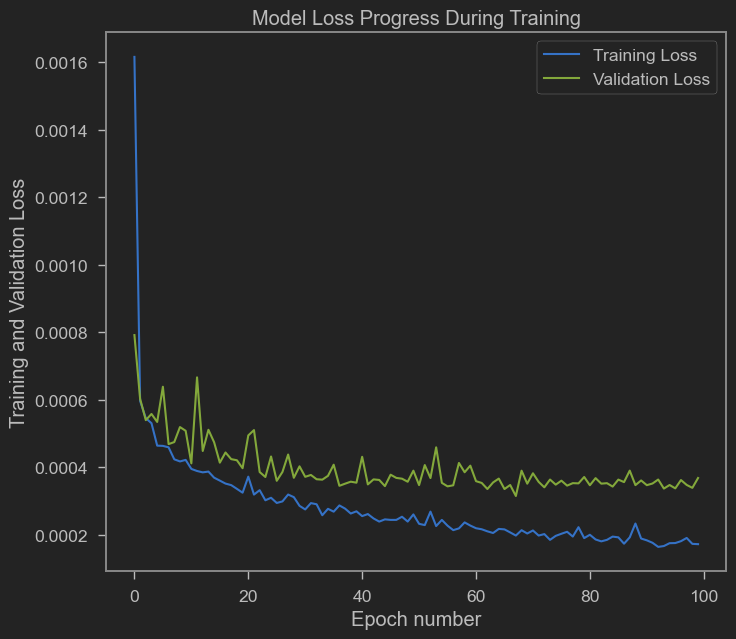

In [55]:
plt.plot(epochs_hist_exercise.history['loss'])
plt.plot(epochs_hist_exercise.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

In [56]:
y_predict_exercise = model_exercise.predict(X_test_complete)

y_predict_orig_exercise = scaler_y_complete.inverse_transform(y_predict_exercise)
y_test_orig_exercise = scaler_y_complete.inverse_transform(y_test_complete)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


**Calculate regression metrics: RMSE, MAE, MSE, R² and Adjusted R²**

In [57]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig_exercise, y_predict_orig_exercise)),'.3f'))
MSE = mean_squared_error(y_test_orig_exercise, y_predict_orig_exercise)
MAE = mean_absolute_error(y_test_orig_exercise, y_predict_orig_exercise)
r2 = r2_score(y_test_orig_exercise, y_predict_orig_exercise)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 131392.015 
MSE = 17263861731.837074 
MAE = 74008.08606616626 
R2 = 0.8741541403530022 
Adjusted R2 = 0.8739908859020147


---

✅ **Evaluation Completed**

We have assessed the performance of the extended model using more features. The results show a significant improvement:

- The training and validation loss continue to decrease consistently.
- The predictions follow the trend of the true values more closely.
- The model achieved better evaluation metrics:
  - **RMSE**: Lower than the previous model.
  - **R²**: Increased to 0.87, indicating improved variance explanation.

Although the loss curves show a few spikes in validation loss, the overall improvement confirms that **adding more relevant features helped the model perform better**.

Further improvements may include tuning the network architecture, adding regularization, or handling potential outliers.
